<a href="https://colab.research.google.com/github/experienciarg200-alt/Python-con-Pandas/blob/main/Actividad7PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Tarea de Grupo No. 2
*   MATRÍCULA: ----------------------------------------------------

En esta actividad trabajarás con el archivo `automobile_dataset.csv`, basado en un conjunto de datos sobre características técnicas y especificaciones de automóviles, disponible en el repositorio UCI Machine Learning.

Los datos fueron recopilados para analizar diferentes aspectos de los vehículos y sus precios, e incluyen información sobre el fabricante, tipo de motor, dimensiones, peso, rendimiento de combustible y otras especificaciones técnicas. Los indicadores incluidos son:

* `symboling`: Nivel de riesgo del seguro del automóvil, de -3 (bajo riesgo) a +3 (alto riesgo)
* `normalized_losses`: Pérdidas normalizadas del seguro (valor numérico de la aseguradora, algunas veces faltante)
* `make`: Marca del automóvil (por ejemplo, Audi, BMW, Honda)
* `fuel_type`: Tipo de combustible (gasolina o diésel)
* `aspiration`: Tipo de aspiración del motor (normal o turbo)
* `num_doors`: Número de puertas del automóvil (dos o cuatro)
* `body_style`: Estilo de carrocería (sedán, hatchback, wagon, hardtop, convertible)
* `drive_wheels`: Tipo de tracción (fwd: delantera, rwd: trasera, 4wd: en las cuatro ruedas)
* `engine_location`: Ubicación del motor (delantero o trasero)
* `wheel_base`: Distancia entre ejes (en pulgadas)
* `length`: Largo total del automóvil (en pulgadas)
* `width`: Ancho total del automóvil (en pulgadas)
* `height`: Altura total del automóvil (en pulgadas)
* `curb_weight`: Peso del automóvil sin carga (en libras)
* `engine_type`: Tipo de motor (OHV, OHC, DOHC, etc.)
* `num_cylinders`: Número de cilindros del motor
* `engine_size`: Tamaño del motor (en cc)
* `fuel_system`: Sistema de combustible (por ejemplo, mpfi, 2bbl, 4bbl)
* `bore`: Diámetro del cilindro (en pulgadas)
* `stroke`: Carrera del pistón (en pulgadas)
* `compression_ratio`: Relación de compresión del motor
* `horsepower`: Potencia del motor (en caballos de fuerza)
* `peak_rpm`: Revoluciones máximas por minuto
* `city_mpg`: Rendimiento de combustible en ciudad (millas por galón)
* `highway_mpg`: Rendimiento de combustible en carretera (millas por galón)
* `price`: Precio del automóvil (en dólares estadounidenses) Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [239]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

1. Descarga el archivo: `automobile_dataset.csv` y guarda, en un dataframe (`cars_df`), todos sus registros.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Al revisar los primeros registros, notarás que la columna `normalized_losses` contiene el símbolo `?`. Esto sugiere que se utilizó para indicar valores faltantes. Identifica todas las columnas que presentan este símbolo.
* Sustituye el símbolo `?` por valores faltantes (`NaN`) y convierte las columnas al tipo de dato adecuado. Esto es necesario porque la presencia del símbolo pudo haber hecho que pandas las interpretara como object, aunque en realidad no lo fueran.

In [240]:
cars_df = pd.read_csv('automobile_dataset.csv')
cars_df.info()
cars_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    int64  
 16  engine_size        205 non

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [241]:
cars_df['normalized_losses'] = cars_df['normalized_losses'].replace("?", np.nan)
cars_df.replace("?", np.nan, inplace=True)
cars_df = cars_df.head(10)
cars_df.head(10)


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN


# Análisis exploratorio de datos (univariado)

2. Antes de iniciar con el análisis univariado, verifica si hay valores duplicados e imprime el porcentaje de faltantes por columna.
* Obtén las estadísticas descriptivas, separado las numéricas (incluye asimetría y curtosis) y las categóricas (incluye tablas de frecuencias).
* Genera histogramas para las numéricas y diagramas de barras para las categóricas.

In [242]:
num_duplicados = cars_df.duplicated().sum()
print(f"Número de registros duplicados: {num_duplicados}")

porcentaje_faltantes = (cars_df.isna().sum() / len(cars_df)) * 100
print("Porcentaje de valores faltantes por columna:")
print(porcentaje_faltantes.sort_values(ascending=False))

Número de registros duplicados: 0
Porcentaje de valores faltantes por columna:
normalized_losses    60.0
price                10.0
make                  0.0
fuel_type             0.0
aspiration            0.0
num_doors             0.0
body_style            0.0
drive_wheels          0.0
engine_location       0.0
symboling             0.0
wheel_base            0.0
length                0.0
height                0.0
width                 0.0
engine_type           0.0
num_cylinders         0.0
engine_size           0.0
curb_weight           0.0
fuel_system           0.0
bore                  0.0
compression_ratio     0.0
stroke                0.0
horsepower            0.0
peak_rpm              0.0
city_mpg              0.0
highway_mpg           0.0
dtype: float64


In [243]:
num_cols = cars_df.select_dtypes(include=['int64', 'float64'])

# Estadísticas descriptivas básicas
desc_num = num_cols.describe().T

# Agregar asimetría y curtosis
desc_num['skewness'] = num_cols.skew()
desc_num['kurtosis'] = num_cols.kurt()

print("Estadísticas descriptivas de variables numéricas:")
print(desc_num)


Estadísticas descriptivas de variables numéricas:
                   count     mean         std     min       25%      50%  \
symboling           10.0     1.60    0.966092     0.0     1.000     1.50   
wheel_base          10.0    98.76    6.467045    88.6    95.725    99.65   
length              10.0   179.56    9.683342   168.8   172.550   176.95   
width               10.0    67.47    2.929562    64.1    65.675    66.35   
height              10.0    53.10    2.644071    48.8    52.100    53.70   
curb_weight         10.0  2752.40  253.230330  2337.0  2548.000  2823.50   
num_cylinders       10.0     4.80    0.632456     4.0     4.250     5.00   
engine_size         10.0   132.70   10.530907   109.0   130.250   133.50   
compression_ratio   10.0     8.58    0.780028     7.0     8.350     8.50   
city_mpg            10.0    19.30    2.263233    16.0    18.250    19.00   
highway_mpg         10.0    24.90    2.923088    20.0    22.750    25.00   

                        75%     max  

In [244]:
cat_cols = cars_df.select_dtypes(include=['object'])

print("Tablas de frecuencia para variables categóricas:\n")

for col in cat_cols.columns:
    print(f"\nVariable: {col}")
    print(cars_df[col].value_counts())


Tablas de frecuencia para variables categóricas:


Variable: normalized_losses
normalized_losses
164    2
158    2
Name: count, dtype: int64

Variable: make
make
audi           7
alfa-romero    3
Name: count, dtype: int64

Variable: fuel_type
fuel_type
gas    10
Name: count, dtype: int64

Variable: aspiration
aspiration
std      8
turbo    2
Name: count, dtype: int64

Variable: num_doors
num_doors
two     5
four    5
Name: count, dtype: int64

Variable: body_style
body_style
sedan          5
convertible    2
hatchback      2
wagon          1
Name: count, dtype: int64

Variable: drive_wheels
drive_wheels
fwd    5
rwd    3
4wd    2
Name: count, dtype: int64

Variable: engine_location
engine_location
front    10
Name: count, dtype: int64

Variable: engine_type
engine_type
ohc     7
dohc    2
ohcv    1
Name: count, dtype: int64

Variable: fuel_system
fuel_system
mpfi    10
Name: count, dtype: int64

Variable: bore
bore
3.19    5
3.47    2
3.13    2
2.68    1
Name: count, dtype: int64

Vari

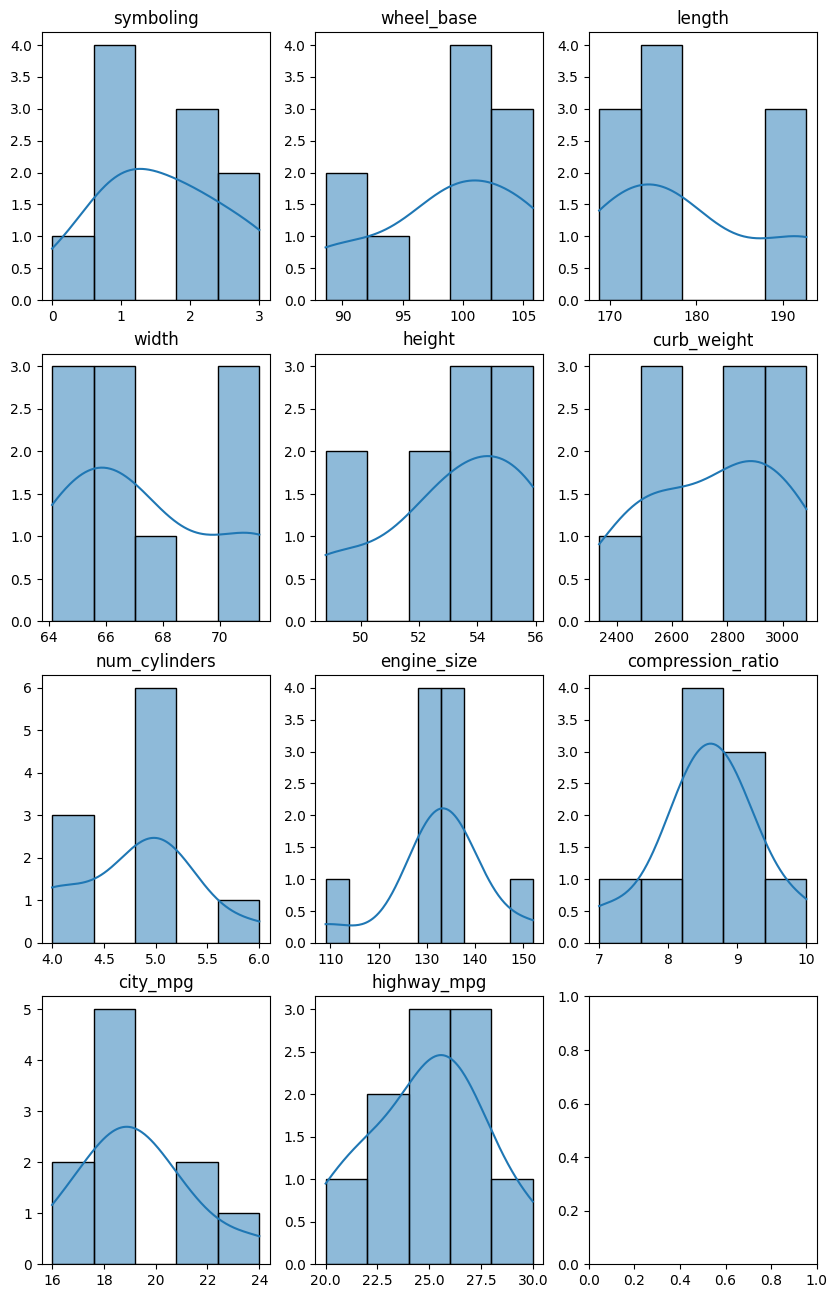

In [245]:
n_cols = 3
# Número total de variables numéricas
num_vars = len(num_cols.columns)

# Calcular número de filas necesarias
n_rows = int(np.ceil(num_vars / n_cols))

# Crear figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))
axes = axes.flatten()  # Aplanar para iterar fácilmente

# Crear histogramas
for i, col in enumerate(num_cols.columns):
    sns.histplot(cars_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

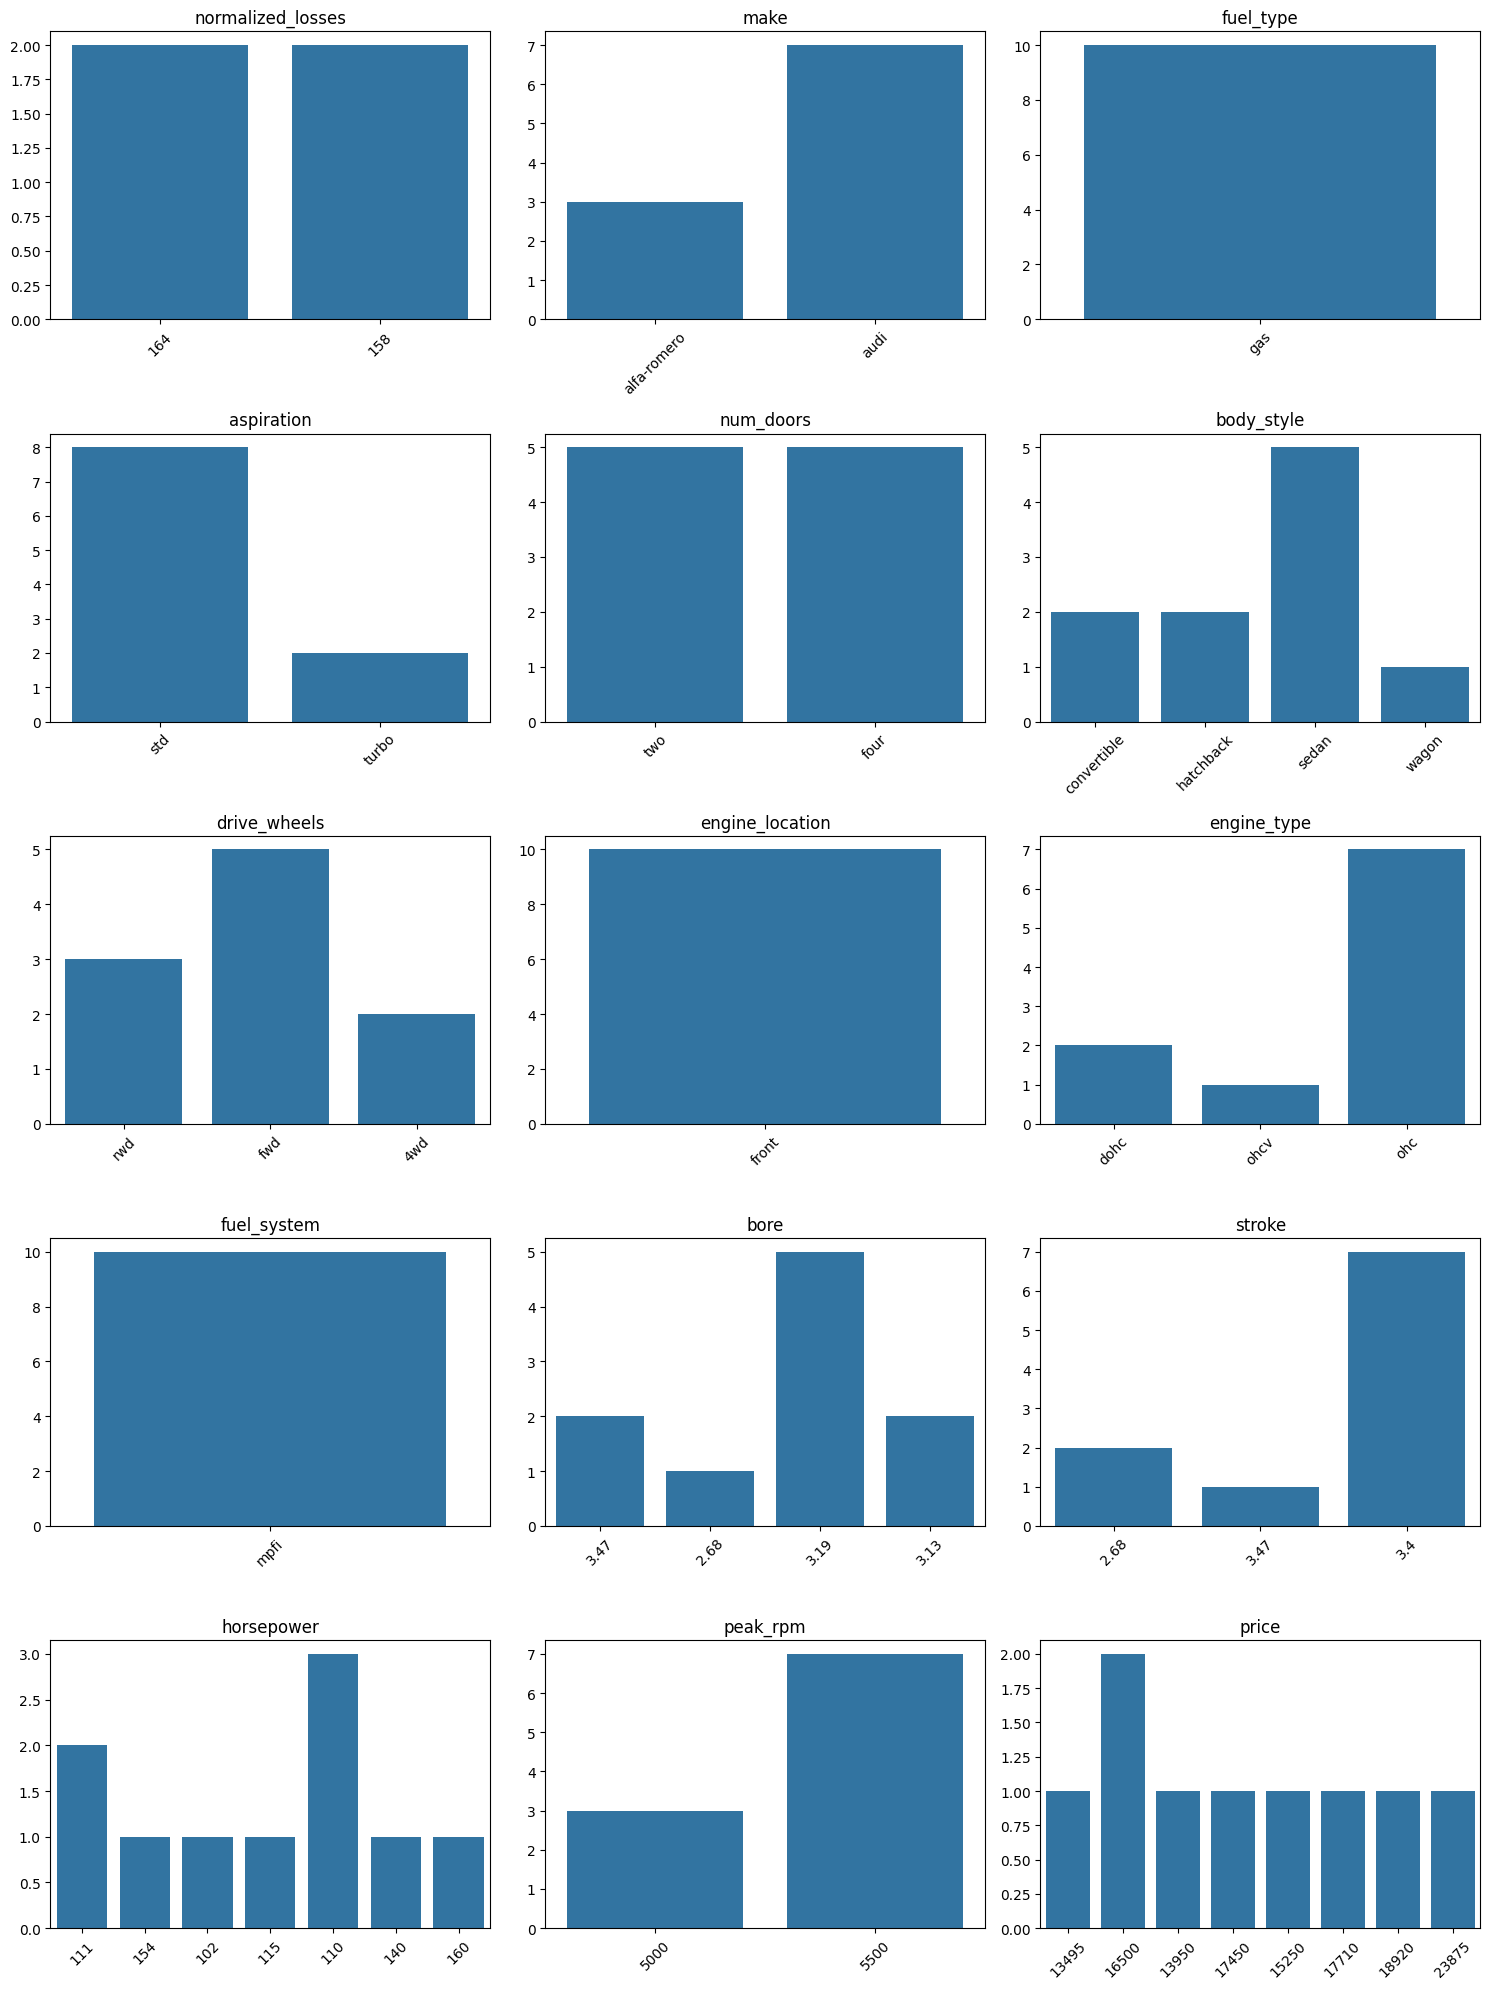

In [246]:
# Número total de variables categóricas
cat_vars = len(cat_cols.columns)

# Calcular número de filas necesarias
n_rows = int(np.ceil(cat_vars / n_cols))

# Crear figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Aplanar para iterar fácilmente

# Crear diagramas de barras
for i, col in enumerate(cat_cols.columns):
    sns.countplot(x=cars_df[col], ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

# Análisis exploratorio de datos (bivariado)

3. Genera algunos gráficos bivariados para familiarizarte con el conjunto de datos:
* Gráfico de barras apiladas normalizadas que muestra la distribución de los tipos de tracción para cada fabricante.
* Diagrama de cajas para visualizar cómo se distribuye el precio de los automóviles según el estilo de carrocería. Esto permitirá comparar la mediana, los cuartiles y la presencia de valores atípicos entre los diferentes tipos de carrocería.
* Gráfico de barras que muestre los 10 automóviles más caros, ordenados de mayor a menor precio, con cada barra diferenciada por fabricante.
* Diagrama de dispersión para explorar la relación entre el tamaño del motor y el precio de los automóviles. Diferencia con colores los puntos según el tipo de aspiración y con el tamaño de los puntos el número de puertas.

**Nota.** Debes incluir en cada gráfico una conclusión de lo observado.

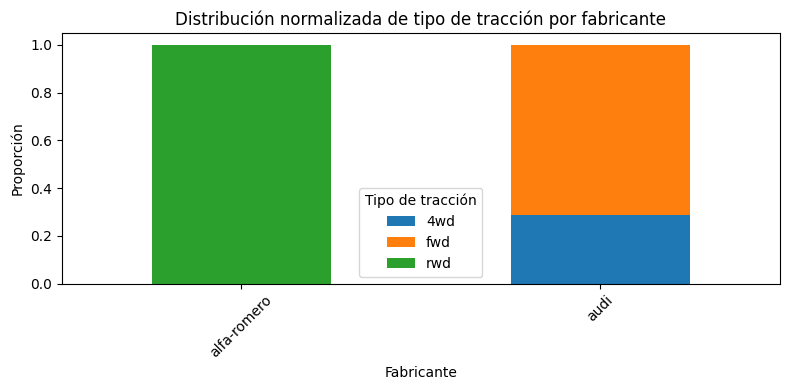

In [247]:
#Tabla cruzada normalizada
drive_make = pd.crosstab(cars_df['make'], cars_df['drive_wheels'], normalize='index')

# Gráfico
drive_make.plot(kind='bar', stacked=True, figsize=(8,4))

plt.title("Distribución normalizada de tipo de tracción por fabricante")
plt.ylabel("Proporción")
plt.xlabel("Fabricante")
plt.legend(title="Tipo de tracción")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

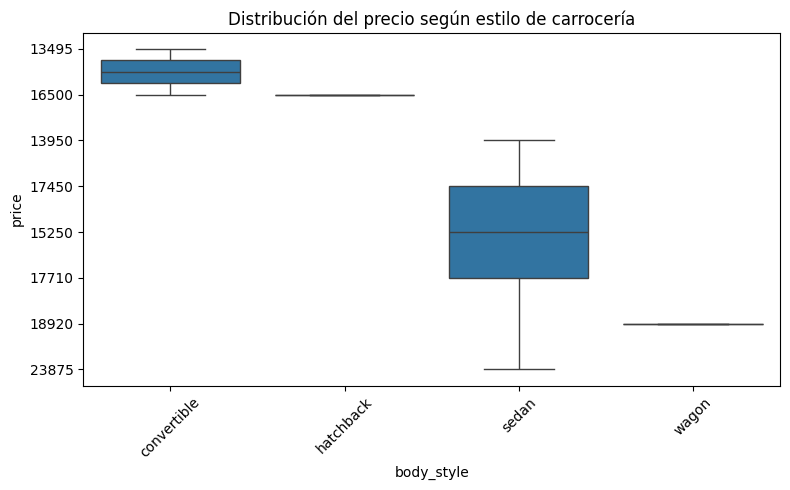

In [248]:
plt.figure(figsize=(8,5))
sns.boxplot(x='body_style', y='price', data=cars_df)

plt.title("Distribución del precio según estilo de carrocería")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

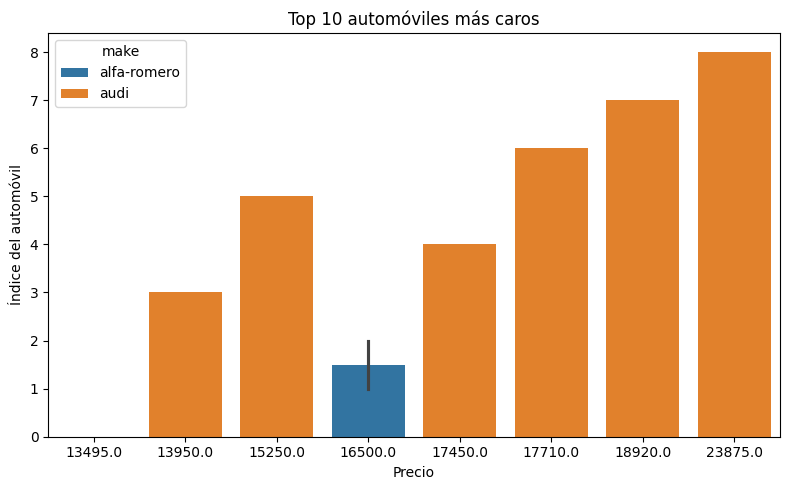

In [249]:
# Convertir price a numérico si aún no lo está
cars_df['price'] = pd.to_numeric(cars_df['price'], errors='coerce')

# Obtener top 10 más caros
top10 = cars_df.sort_values(by='price', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='price', y=top10.index, hue='make', data=top10, dodge=False)

plt.title("Top 10 automóviles más caros")
plt.xlabel("Precio")
plt.ylabel("Índice del automóvil")
plt.tight_layout()
plt.show()

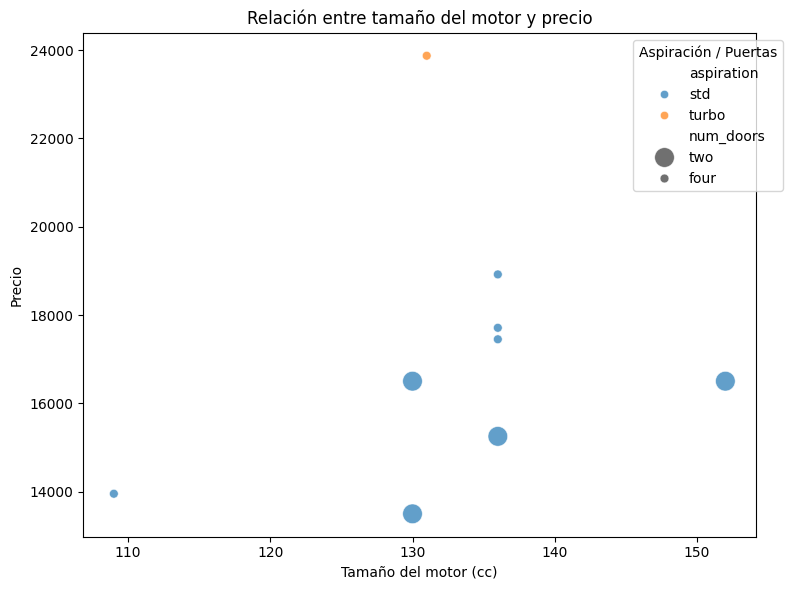

In [250]:
#Presentación del diagrama de dispersión
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=scatter_df,
    x='engine_size',
    y='price',
    hue='aspiration',
    size='num_doors',
    sizes=(40, 200),
    alpha=0.7 )

plt.title("Relación entre tamaño del motor y precio")
plt.xlabel("Tamaño del motor (cc)")
plt.ylabel("Precio")
plt.legend(title="Aspiración / Puertas", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


4. Genera un mapa de calor de la matriz de correlación entre las variables numéricas del conjunto de datos, mostrando los valores de correlación en cada celda.
* ¿Cuáles son las tres variables más correlacionadas con el precio?

Las tres variables más correlacionadas con el precio son:
curb_weight    0.872702
highway_mpg    0.828053
width          0.745230
Name: price, dtype: float64

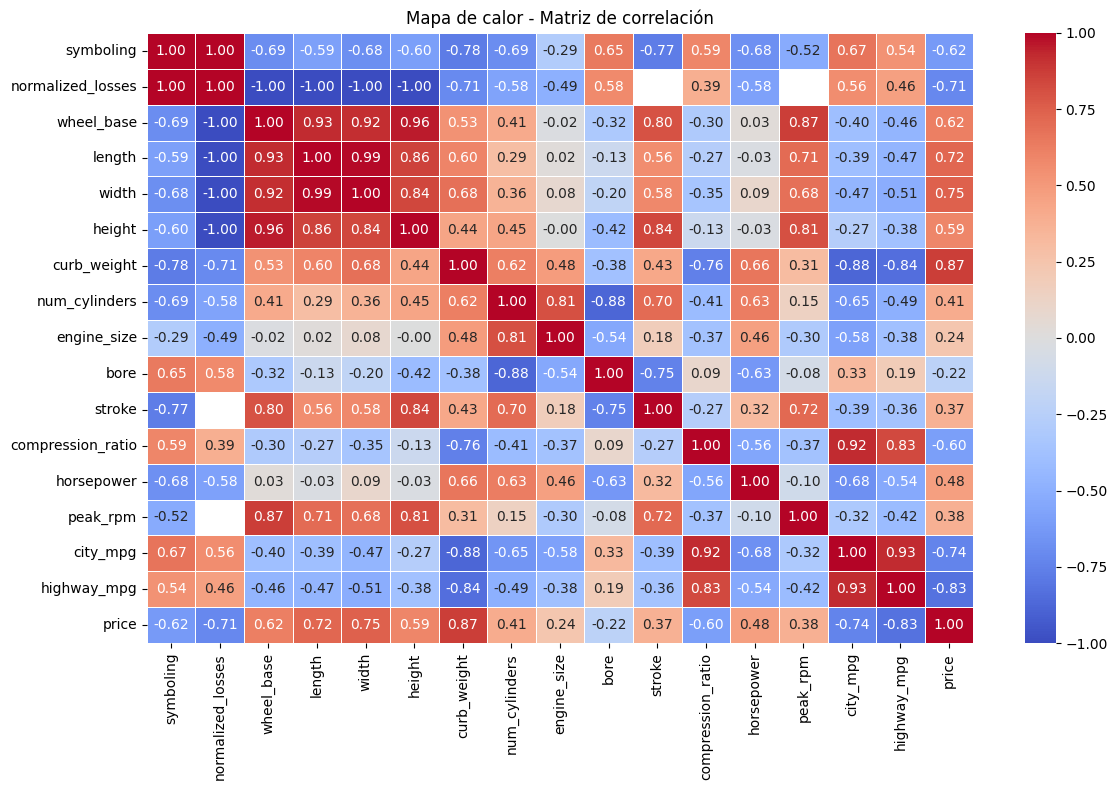

In [251]:
plt.figure(figsize=(12,8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5 )

plt.title("Mapa de calor - Matriz de correlación")
plt.tight_layout()
plt.show()

In [252]:
# Correlaciones con el precio
price_corr = corr_matrix['price'].drop('price')

top3 = price_corr.abs().sort_values(ascending=False).head(3)

print("Las tres variables más correlacionadas con el precio son:")
print(top3)

Las tres variables más correlacionadas con el precio son:
curb_weight    0.872702
highway_mpg    0.828053
width          0.745230
Name: price, dtype: float64


En el análisis de correlación se observa que existen muchos pares de variables altamente correlacionadas, lo que puede afectar el desempeño de los modelos de regresión. PCA resulta útil no solo para reducir la dimensionalidad, sino también porque los componentes principales son ortogonales entre sí, es decir, tienen correlación cero, evitando problemas de multicolinealidad. Esto lo podrás comprobrar más adelante.

# Ingeniería de características

5. Realiza las siguientes operaciones de ingeniería de características en las variables numéricas:
* Aplica `SimpleImputer` para tratar los valores faltantes, justificando la estrategia de imputación seleccionada.
* Considera `price` como la variable objetivo y guárdala en `y`. Separa los predictores numéricos en `X`. Con base en estos datos, ¿cuántos componentes principales se generarán al aplicar PCA?
* Escala los valores de `X` para que todas las variables contribuyan equitativamente y ninguna domine el análisis por tener una escala mayor.

PCA está diseñado principalmente para variables numéricas y funciona encontrando combinaciones lineales de las variables originales que capturan la mayor varianza en los datos. Normalmente se recomienda eliminar las variables categóricas antes de aplicar PCA y luego concatenarlas nuevamente con los resultados de PCA si se desea.

In [253]:
# Seleccionar variables numéricas
num_cols = cars_df.select_dtypes(include=['int64', 'float64'])

# Separar variable objetivo
y = num_cols['price']

# Separar predictores numéricos
X = num_cols.drop(columns=['price'])

# Crear imputador con estrategia de media
imputer = SimpleImputer(strategy='mean')

# Aplicar imputación
X_imputed = imputer.fit_transform(X)

# Convertir nuevamente a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
print("Número de variables predictoras numéricas:", X_imputed.shape[1])

Número de variables predictoras numéricas: 11


In [254]:
# Crear objeto escalados
scaler = StandardScaler()

# Escalar datos imputados
X_scaled = scaler.fit_transform(X_imputed)

# Convertir nuevamente a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)
print(X_scaled.head())

   symboling  wheel_base    length     width    height  curb_weight  \
0   1.527525   -1.656024 -1.171294 -1.212568 -1.714250    -0.850832   
1   1.527525   -1.656024 -1.171294 -1.212568 -1.714250    -0.850832   
2  -0.654654   -0.694356 -0.910038 -0.708830 -0.279064     0.293878   
3   0.436436    0.169514 -0.322215 -0.456962  0.478395    -1.729137   
4   0.436436    0.104316 -0.322215 -0.384999  0.478395     0.298041   

   num_cylinders  engine_size  compression_ratio  city_mpg  highway_mpg  
0      -1.333333    -0.270257           0.567568  0.791769     0.757279  
1      -1.333333    -0.270257           0.567568  0.791769     0.757279  
2       2.000000     1.931836           0.567568 -0.139724     0.396670  
3      -1.333333    -2.372255           1.918919  2.189008     1.839107  
4       0.333333     0.330314          -0.783784 -0.605470    -1.045767  


6. Aplica `PCA` a los datos escalados para proyectarlos en el nuevo espacio de vectores.
* Asigna nombres descriptivos a los componentes principales en el dataframe resultante, utilizando la convención PC1, PC2, PC3, y así sucesivamente.
* Genera un mapa de calor con la matriz de correlaciones de los componentes principales para verificar que sean independientes entre sí.

In [255]:
# Crear objeto PCA
pca = PCA()

# Ajustar y transformar los datos escalados
X_pca = pca.fit_transform(X_scaled)

# Crear nombres dinámicos para los componentes
pc_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]

# Convertir a DataFrame con nombres adecuados
X_pca_df = pd.DataFrame(X_pca, columns=pc_names)

# Visualizar primeras filas
print(X_pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.628492  0.972772 -0.645638  0.464393 -0.456886  0.016050 -0.011362   
1 -3.628492  0.972772 -0.645638  0.464393 -0.456886  0.016050 -0.011362   
2  0.151491  1.986228  2.515315 -0.421115 -0.125542  0.384383 -0.028683   
3 -3.412641 -3.200964  0.099696 -0.953695  0.357262  0.268910  0.024683   
4  0.796928  0.924678 -0.383550  0.486106  1.015720  0.110205  0.384960   

        PC8           PC9          PC10  
0 -0.002124  2.323033e-16  6.860580e-18  
1 -0.002124 -1.654028e-16  7.947878e-17  
2 -0.004061  3.345021e-17  4.316968e-17  
3 -0.001341  3.345021e-17  4.316968e-17  
4 -0.017110  3.345021e-17  4.316968e-17  


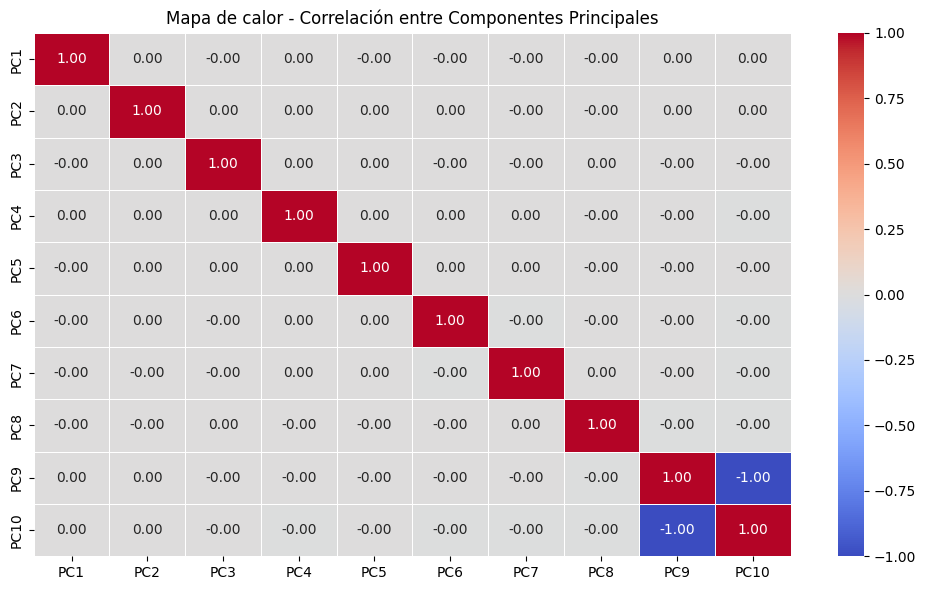

In [256]:
# Calcular matriz de correlación entre componentes
pc_corr = X_pca_df.corr()

plt.figure(figsize=(10,6))

sns.heatmap(
    pc_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5 )

plt.title("Mapa de calor - Correlación entre Componentes Principales")
plt.tight_layout()
plt.show()

7. Obtén el porcentaje de varianza explicada por cada componente.
* Grafica la curva de varianza acumulada para determinar el número mínimo de componentes principales que explican más del 90% de la varianza total.

El primer componente principal explica el 59.71% de la varianza total, lo que indica que una sola combinación lineal captura una parte significativa de la información del conjunto de datos.

Los tres primeros componentes acumulan un 91.69% de la varianza total, superando el umbral del 90%.

Por tanto, es posible reducir la dimensionalidad del conjunto de datos de 10 variables originales a 3 componentes principales sin pérdida sustancial de información.

Esto demuestra que existe una alta correlación entre las variables originales y que PCA logra representar eficientemente la estructura del dataset.

In [257]:
# Varianza explicada individual
explained_variance = pca.explained_variance_ratio_

# Mostrar porcentaje por componente
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var*100:.2f}%")

PC1: 59.71%
PC2: 22.22%
PC3: 9.76%
PC4: 3.97%
PC5: 2.64%
PC6: 1.35%
PC7: 0.33%
PC8: 0.01%
PC9: 0.00%
PC10: 0.00%


8. Imprime la información de los componentes seleccionados (cargas o pesos de las variables originales) para interpretar qué variables contribuyen más a cada componente principal.
* Dibuja un diagrama de barras que muestre qué variables originales aportan más al primer componente principal (PC1), para visualizar su influencia relativa.

In [258]:
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

# Crear DataFrame de cargas
loadings = pd.DataFrame(
    pca_3.components_,
    columns=X.columns,
    index=['PC1', 'PC2', 'PC3'] )

print(loadings)

     symboling  wheel_base    length     width    height  curb_weight  \
PC1  -0.332582    0.312421  0.305016  0.326791  0.279755     0.353951   
PC2   0.010322   -0.365993 -0.361837 -0.312445 -0.389591     0.152674   
PC3  -0.097677    0.039199 -0.033803 -0.029751  0.197094    -0.117942   

     num_cylinders  engine_size  compression_ratio  city_mpg  highway_mpg  
PC1       0.274610     0.166333          -0.275574 -0.329023    -0.318021  
PC2       0.221010     0.418087          -0.312288 -0.314003    -0.206252  
PC3       0.575502     0.528055           0.421479  0.187696     0.333495  


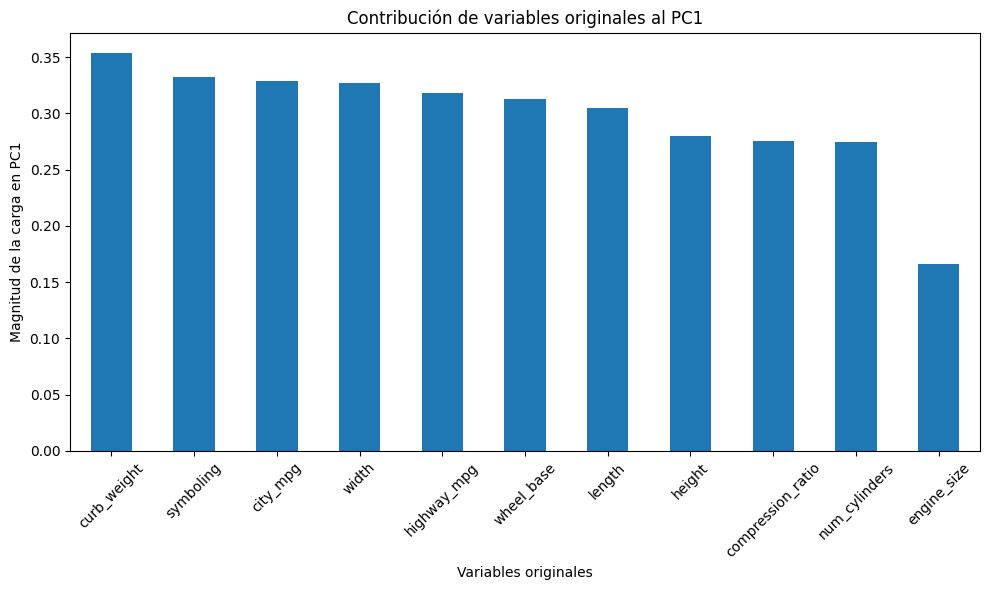

In [259]:
# Obtener cargas de PC1 ordenadas por valor absoluto
pc1_loadings = loadings.loc['PC1'].abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
pc1_loadings.plot(kind='bar')

plt.xlabel("Variables originales")
plt.ylabel("Magnitud de la carga en PC1")
plt.title("Contribución de variables originales al PC1")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9. Codifica las variables categóricas mediante *One-Hot Encoding* y utiliza el parámetro `drop='first'` para evitar problemas de multicolinealidad entre las variables dummy generadas.

In [261]:
cat_cols = cars_df.select_dtypes(include=['object']).columns.tolist()

cars_encoded = pd.get_dummies(
    cars_df,
    columns=cat_cols,
    drop_first=True
)

print(cars_encoded.head())


   symboling  wheel_base  length  width  height  curb_weight  num_cylinders  \
0          3        88.6   168.8   64.1    48.8         2548              4   
1          3        88.6   168.8   64.1    48.8         2548              4   
2          1        94.5   171.2   65.5    52.4         2823              6   
3          2        99.8   176.6   66.2    54.3         2337              4   
4          2        99.4   176.6   66.4    54.3         2824              5   

   engine_size  compression_ratio  city_mpg  ...  bore_3.47  stroke_3.4  \
0          130                9.0        21  ...       True       False   
1          130                9.0        21  ...       True       False   
2          152                9.0        19  ...      False       False   
3          109               10.0        24  ...      False        True   
4          136                8.0        18  ...      False        True   

   stroke_3.47  horsepower_110  horsepower_111  horsepower_115  \
0       

In [262]:
print(cars_encoded.dtypes.value_counts())

bool       23
int64       6
float64     6
Name: count, dtype: int64


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas y la variable de salida.
* Almacena el dataframe resultante en archivo.

In [263]:
#PCA con 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
y = cars_encoded['price']

#Eliminar columnas numéricas originales y price
X_categorical = cars_encoded.drop(columns=X.columns.tolist() + ['price'])

final_df = pd.concat([pca_df, X_categorical, y], axis=1)
final_df.to_csv('automobile_dataset_final.csv', index=False)

print(final_df.head())

        PC1       PC2       PC3  normalized_losses_164  make_audi  \
0 -3.628492  0.972772 -0.645638                  False      False   
1 -3.628492  0.972772 -0.645638                  False      False   
2  0.151491  1.986228  2.515315                  False      False   
3 -3.412641 -3.200964  0.099696                   True       True   
4  0.796928  0.924678 -0.383550                   True       True   

   aspiration_turbo  num_doors_two  body_style_hatchback  body_style_sedan  \
0             False           True                 False             False   
1             False           True                 False             False   
2             False           True                  True             False   
3             False          False                 False              True   
4             False          False                 False              True   

   body_style_wagon  ...  stroke_3.4  stroke_3.47  horsepower_110  \
0             False  ...       False        Fal